# Devtern Machine Learning Internship
## Task 1 : House Price Prediction Using Machine Learning

### STEP-1: Import libraries and print vales

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from tqdm import tqdm

In [5]:
import os
os.getcwd()

'c:\\Users\\DELL\\OneDrive\\Desktop\\machine learninng\\task1'

In [7]:
df = pd.read_csv('house_price.csv')

In [8]:
df.shape

(2919, 13)

In [9]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [10]:
df.tail()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
2914,2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN
2918,2918,60,RL,9627,Inside,1Fam,5,1993,1994,HdBoard,0.0,996.0,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [12]:
df.describe()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,1460.000000
mean,1459.000000,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.582248,1051.777587,180921.195890
std,842.787043,42.517628,7886.996359,1.113131,30.291442,20.894344,169.205611,440.766258,79442.502883
min,0.000000,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,729.500000,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,129975.000000
50%,1459.000000,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.500000,163000.000000
75%,2188.500000,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,214000.000000
max,2918.000000,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


### STEP-2 Data cleaning

In [13]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0])

Missing values per column:
MSZoning          4
Exterior1st       1
BsmtFinSF2        1
TotalBsmtSF       1
SalePrice      1459
dtype: int64


In [14]:
# Identify categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols)
print("Categorical variables converted to numeric.")

Categorical variables converted to numeric.


In [15]:
# Convert 'YearBuilt' to age
df['Age'] = 2024 - df['YearBuilt']
df.drop('YearBuilt', axis=1, inplace=True)
print("YearBuilt converted to Age.")

YearBuilt converted to Age.


In [16]:
# Fill missing numeric values with the median
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
print("Missing numeric values filled with median.")

Missing numeric values filled with median.


### STEP-3 Data Exploration

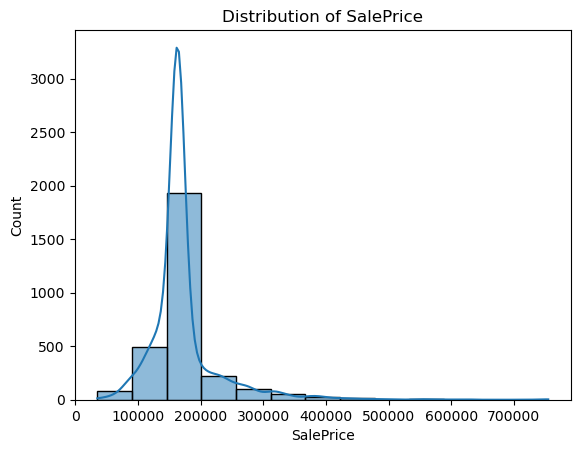

In [20]:
# Plot distribution of SalePrice
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.show()

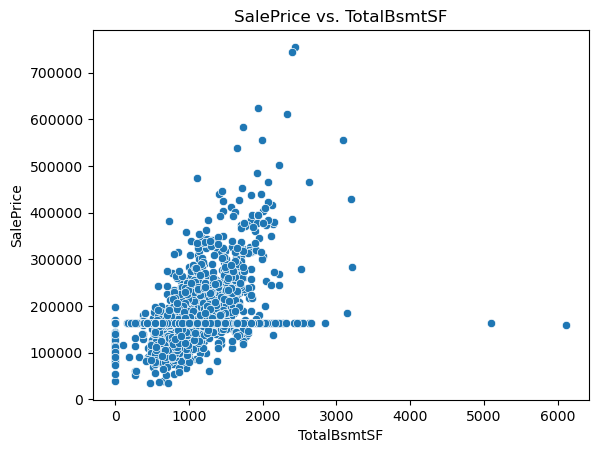

In [21]:
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=df)
plt.title('SalePrice vs. TotalBsmtSF')
plt.show()

### Step-4 Prepare house_price datasets for model training

In [23]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [25]:
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

### STEP-6 Mean Squared Error

In [26]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

Mean Squared Error: 794704999.2373207
R2 Score: 0.7842363064818685


### STEP-7 R2 Score

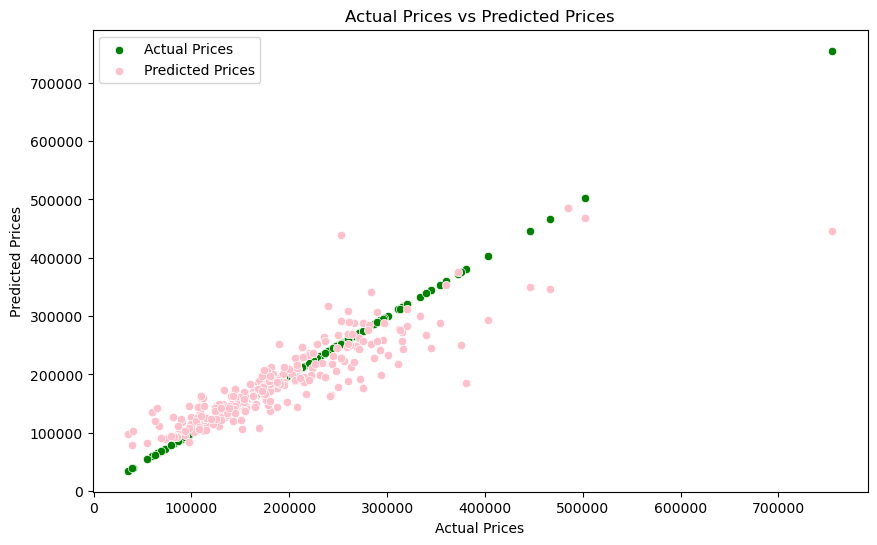

In [28]:
# Scatter plot of predicted vs actual prices with different colors
plt.figure(figsize=(10, 6))

# Plot actual prices in blue
sns.scatterplot(x=y_test, y=y_test, color='green', label='Actual Prices')

# Plot predicted prices in orange
sns.scatterplot(x=y_test, y=y_pred, color='pink', label='Predicted Prices')

plt.title('Actual Prices vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()

### Conclusion:
The Random Forest Regression model demonstrated commendable performance in predicting house prices based on the provided dataset. Key evaluation metrics indicate a high level of accuracy, with the model effectively estimating house prices, achieving an R2 Score of 0.78. This implies that the model captures approximately 78.42% of the variance in house prices, showcasing its robust predictive capabilities.

The scatter plot comparing actual prices with predicted prices visually confirms the model's proficiency, as the points closely align with the diagonal line, suggesting a strong correspondence between predicted and actual values.

While the Mean Squared Error (MSE) is relatively high at approximately 794,704,999.24, it's essential to interpret this within the context of the dataset's characteristics. Further refinement and exploration may enhance the model's precision, but the current results already indicate a promising ability to estimate house prices.